# The Monte Carlo Simulation of Radiation Transport

WE will discuss essentiall physics and method to do gamma quanta (photons with high enough energy) radiation transport using Monte Carlo methods. We will covers interactions processes, basics of radiation passing through matter as well as Monte Carlo method and how it helps with radiation propagation. 

## Glossary
- $h$ Plank's constant
- $\hbar$ reduced Plank's constant, $h/2\pi$
- $\omega$ photon circular frequency, 
- $E_\gamma$ photon energy, equal to $\hbar \omega$
- $\lambda$ photon wavelength
- $\theta$ scattering angle, between incoming and outgoing photon
- $c$ speed of light in vacuum
- $m_e$ electron mass
- $r_e$ classical electron radius


## Basic physics

We would cover typical energies and wave length when photons are behaving like a point-like particle interaction with matter.

### Units

Common unit for a photon energy would be electron-volt (eV). This is the kinetic energy electron aquire when it moves in electric field (say, between plates of the capacitor) with potential difference 1Volt. This is very small energy and is equal to about $1.6\times10^{-19}$Joules. Typical energies we are interested inare in the 1keV to 100MeV range.

### Spatial size and wave length

Photons are massless particles, and it is very easy to compute photon "size" which is photon wavelength.
$$ \lambda = \frac{hc}{E_\gamma} $$
where $\lambda$ is wavelength, $h$ is Plank's constant, $c$ is speed of light and $E\gamma$ is photon energy. For example, lets compute wavelength for photon with energy 1eV.

In [2]:
h = 6.625e-34
c = 3e8
Eg = 1.0 * 1.6e-19 # eV
λ = h*c/Eg
print(f"Photon wavelength = {λ*1.0e9} nanometers")

Photon wavelength = 1242.1875 nanometers


Thus, for 1keV photon we will get wave length about 1.2 nm, and for 1MeV photon we will get wave length about $1.2\times10^{-3}$nm.

FOr comparison, typical atom size is from 0.1nm (He) to 0.4nm (Fr and other heavy). Therefore, for most interactions between photon and atoms in our enery range we could consider it particles, not waves.

## Basics of Monte Carlo methods

Was first introduced by Conte du Buffon, as needle dropping experiment to calculate value of $\pi$. Laplace extended the example of the CduB by using sampling in the square to calculate value of $\pi$. It is a very general method of stochastic integration of the function. Was successfully applied to the particles (neutron in this case) transport by Enrico Fermi. Since growing applications of computers it is growing exponentially in use - finances, radiation therapy, machine learning, astrophysics, optimizations, younameit.

Let's try to calculate $\pi$ with the Laplace method, namely sampe points uniformly in the 

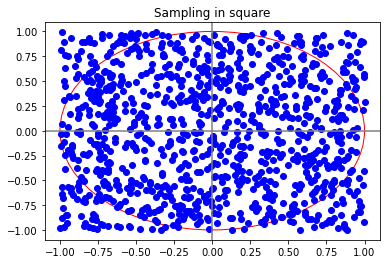

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

N = 1000 # number of points to sample

x = 2.0*np.random.random(N) - 1.0
y = 2.0*np.random.random(N) - 1.0

unitCircle = plt.Circle((0, 0), 1.0, color='r', fill=False)

fig, ax = plt.subplots(1, 1)

ax.plot(x, y, 'bo', label='Sampling in square')
ax.add_artist(unitCircle)
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
plt.title("Sampling in square")
plt.show()


In [4]:
r = np.sqrt(x*x + y*y)
#print(r)
pinside = r[r<=1.0]
Ninside = len(pinside)
print(4.0*Ninside/N)

3.256


## Basic Photons Interactions with atoms

There are several interaction processess of photons with media.

### Compton Scattering

Compton scattering is described by Klein-Nishina formula
$$
\hbar \omega'=\frac{\hbar\omega}{1+\frac{hw}{m_e c^2} (1 - \cos{\theta})}
$$
where prime marks particle after scattering. It is clear to see that for backscattering photon ($\theta=\pi$, $\cos{\theta}=-1$) the energy of scattered photon reach minimum, which means scattered photon energy has limits
$$
\frac{\hbar \omega }{1 + 2\hbar\omega/m_ec^2} \le \hbar\omega' \le \hbar\omega
$$

Scattering cross-section (you could think of this as denormalized probability to be scattered to a given angle)
$$
\frac{d\sigma}{d\hbar\omega'} = \pi r_e^2 \frac{m_ec^2}{(\hbar\omega)^2} \lbrace \frac{\hbar\omega}{\hbar\omega'} + \frac{\hbar\omega'}{\hbar\omega} +
\left ( \frac{m_ec^2}{\hbar\omega'} - \frac{m_ec^2}{\hbar\omega} \right )^2 - 
2m_ec^2 \left ( \frac{1}{\hbar\omega'} - \frac{1}{\hbar\omega} \right ) \rbrace
$$

Full cross-section, where $x=2 \hbar\omega/m_e c^2$ is double relative photon enery.
$$
\sigma=2\pi r_e^2\frac{1}{x}\lbrace \left ( 1 - \frac{4}{x} - \frac{8}{x^2} \right ) \log{(1+x) +\frac{1}{2} + \frac{8}{x}-\frac{1}{2(1+x)^2}} \rbrace
$$

Then we could divide partial cross-section by total cross-section and get probability of scattered photon energy for different incoming photons. Lets plot few graphs. As one can see, cross-section has dimension of area. They are very small, therefore cross-sections are measured in barns, one barn being $10^-{24}$ centimeter squared.

Let's for reference add expression how to compute angular differential cross-section
$$
\frac{d\sigma}{d\omicron'} = \frac{1}{2} r_e^2 \left( \frac{\hbar\omega'}{\hbar\omega}\right)^2 \left(\frac{\hbar\omega}{\hbar\omega'} + \frac{\hbar\omega'}{\hbar\omega} - \sin^2{\theta}\right)
$$

Let's move to more appropriate units: energy would be always in MeV, unit of length for cross-sections would be in femtometers (1fm = $10^{-15}m$). Barn is 100 femtometers squa.

In [5]:
# usefule constants
MeC2 = 0.511 # in MeV
Re   = 2.82 # fm

In [6]:
# main functions to deal with cross-sections
def hw_prime(hw, cos_theta):
    """computes outgoing photon energy vs cosine of the scattered angle"""
    hwp = hw/(1.0 + (1.0 - cos_theta)*hw/MeC2)
    return hwp

def hwp_minimum(hw):
    """Computes minimum scattere energy in MeV given incoming photon energy hw"""
    return hw/(1.0 + 2.0*hw/MeC2)

def total_cross_section(hw):
    """Klein-Nishina total cross-section, LDL p.358, eq (86.16)"""
    if hw <= 0.0:
        raise RuntimeError(f"Photon energy is negative: {hw}")
    x = 2.0 * hw / MeC2
    q = 1.0/x
    z = (1.0 + x)
    
    σ = 2.0*np.pi*Re*Re * q * ((1.0 - 4.0*q - 8.0*q*q)*np.log(z) + 0.5 + 8.0*q - 0.5/z/z)
    return σ

def diff_cross_section_dhwp(hw, hwp):
    """Differential cross-section over outgoing photon energy"""
    if hw <= 0.0:
        raise RuntimeError(f"Photon energy is negative or zero: {hw}")
        
    if hwp <= 0.0:
        raise RuntimeError(f"Scattered photon energy is negative or zero: {hwp}")

    if hwp < hwp_minimum(hw): # outgoing energy cannot be less than minimum allowed
        return 0.0

    ei = MeC2/hw
    eo = MeC2/hwp

    dσ_dhwp = np.pi*Re*Re * (ei/hw) * (ei/eo + eo/ei + (eo-ei)**2 - 2.0*(eo-ei))
    return dσ_dhwp

def diff_cross_section_dOp(hw, theta):
    """Differential cross-section over outgoing photon differential angle"""
    cst = np.cos(theta)
    hwp = hw_prime(hw, cst)
    rhw = hwp/hw
    dσ_dOp = 0.5*np.pi*Re*Re * rhw*rhw*(rhw + 1.0/rhw - (1.0 - cst)*(1.0 + cst))
    return dσ_dOp

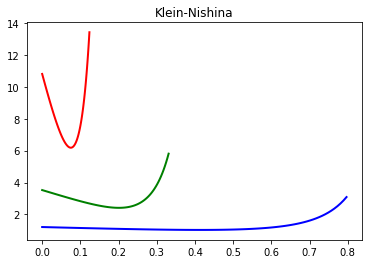

In [10]:
def make_energyloss_curve(hw):
    N = 101
    hwm = hwp_minimum(hw)
    hws = np.linspace(0.0, hw-hwm, N)
    st  = total_cross_section(hw)
    sc  = np.empty(101)
    for k in range(0, len(hws)):
        hwp = hw - hws[k]
        sc[k]  = diff_cross_section_dhwp(hw, hwp)/st

    return hws, sc

q_p25, s_p25 = make_energyloss_curve(0.25)
q_p50, s_p50 = make_energyloss_curve(0.50)
q_1p0, s_1p0 = make_energyloss_curve(1.00)

fig, ax = plt.subplots(1, 1)

ax.plot(q_p25, s_p25, 'r-', lw=2, label='Scattering probability vs energy loss, 0.25MeV')
ax.plot(q_p50, s_p50, 'g-', lw=2, label='Scattering probability vs energy loss, 0.50MeV')
ax.plot(q_1p0, s_1p0, 'b-', lw=2, label='Scattering probability vs energy loss, 1.00MeV')
plt.title("Klein-Nishina")
plt.show()

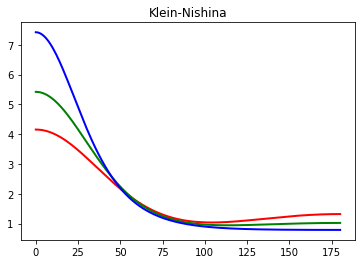

In [8]:
def make_angular_curve(hw):
    """Helper function to make angular probability x,y arrays given incoming photon enenrgy, MeV"""
    N = 181

    theta_d = np.linspace(0.0, 180.0, N) # angles in degrees
    theta_r = theta_d * np.pi / 180.0
    st = total_cross_section(hw)
    so = np.empty(N)

    for k in range(0, len(so)):
        so[k] = diff_cross_section_dOp(hw, theta_r[k]) * 2.0*np.pi / st

    return theta_d, so

a_p25, s_p25 = make_angular_curve(0.25)
a_p50, s_p50 = make_angular_curve(0.50)
a_1p0, s_1p0 = make_angular_curve(1.00)

fig, ax = plt.subplots(1, 1)

ax.plot(a_p25, s_p25, 'r-', lw=2, label='Scattering angular probability, 0.25MeV')
ax.plot(a_p50, s_p50, 'g-', lw=2, label='Scattering angular probability, 0.50MeV')
ax.plot(a_1p0, s_1p0, 'b-', lw=2, label='Scattering angular probability, 1.00MeV')
plt.title("Klein-Nishina")
plt.show()

## Cross-sections

We learned about so-called microscopic cross-sections, which is oneabout one photon scattering on one electron. It is very small, measyred in barns which is $10^{-24}$ cm$^2$. 
